# Исследование факторов, влияющих на потенциальную успешность игры

Мы проведём анализ статистики интернет-магазина "Стримчик" за 2016 год, чтобы спланировать стратегию и тактику продаж и рекламных кампаний в следующем году. Мы располагаем данными о продажах игр, оценками пользователей и экспертов, а также данными о самих играх - жанр, платформа, дата релиза и т.п. Задачей исследования является выявление закономерностей, которые определяют успешность игры, чтобы впоследствии выявлять потенциально популярные продукты и направлять на них маркетинговые усилия. 
В начале мы проведём потготовку данных к анализу (проведём работу с типами данных, пропусками и т.д.), затем осуществим исследовательский анализ обработанных данных, составим портрет пользователя каждого региона и проверим несколько гипотез, важных для планирования кампаний в следующем году. Все выводы, к которым мы придём, будут приведены в финале исследования.

**Содежание**:
1. [Введение](#intr)
2. [Предобработка данных](#pre)
3. [Исследовательский анализ](#analys)
4. [Портреты пользователей по регионам](#regions)
5. [Проверка гипотез](#check)
6. [Выводы](#end)

### Введение <a name="intr"></a>

Для проведения анализа данных мы вначале изучим общую информацию о датасете. Затем проведём предобработку данных: выясним, есть ли в данных пропуски и неудобные для анализа типы данных. Если такие проблемы в датасете есть, то мы предложим свои варианты решения. Далее, возможно, нам понадобится рассчитать и добавить в таблицу новые метрики, которые будут полезны для дальнейшего анализа. 
После этих процедур можно будет приступить к исследовательскому анализу данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import random

In [2]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Мы видим, что в датасете есть пропуски, а также в некоторых столбцах тип данных несоответствует содержанию (например, в столбце Year_of_Release). Также следует привести названия всех столбцов к нижнему регистру. Этим мы займёмся на этапе предобработки данных. 

### Предобработка данных <a name="pre"></a>

Приведём названия столбцов к нижнему регистру.

In [5]:
data.columns = map(str.lower, data.columns)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В нескольких столбцах датасета есть пропуски. Нам необходимо понять, насколько их много в каждом столбце. Посмотрим их процентное распределение. 

In [6]:
display(pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm'))

,0
name,0.000000
platform,0.000000
year_of_release,2.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.000000
user_score,40.000000


Количество пропусков критично для столбцов critic_score, user_score и rating. Во всех остальных столбцах пропущенные значения не превышают 2%, поэтому они не скажутся на статистике и их можно удалить. 

In [7]:
#Удаляем строки с пропусками в столбцах name, year_of_release, genre.
data = data.dropna(subset=['name', 'year_of_release', 'genre'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Теперь займёмся пропусками в столбце critic_score (так как далее нужно будет разобраться со столбцом "оценки пользователей", то создадим типовой алгоритм анализа, который впоследствии применим и к оценкам пользователей). Возможно, большинство пропусков связаны с какими-то конкретными платформами. Проверим:

In [8]:
analyzed_column = 'critic_score'

#Создадим копию датасета, чтобы не изменять исходные данные, далее отметим "флагом" пропущенные значения, бодавив соответствующий столбец
data_t = data
data_t['nan_flg'] = data_t[analyzed_column].isna()

#Посчитаем общие продажи
data_t['sales'] = data_t['na_sales'] + data_t['jp_sales'] + data_t['eu_sales'] + data_t['other_sales']

#Сгруппируем данные по платформам, чтобы рассмотреть общие продажи по платформам
p = data_t[['platform', 'name']].groupby('platform').count().reset_index().sort_values(by = 'name', ascending = False)

#Добавим столбец с комулятивной суммой, чтобы понять, какие платформы заработали больше остальных


#Объединяем таблицы по столбцу 'platform'
data_t = data_t.merge(p, how = 'left', left_on = 'platform', right_on = 'platform')

data_t['game_cnt'] = 1

#Создаём сводную таблицу, чтобы посмотреть распределение пропусков по платформам
pt = pd.pivot_table(data_t,
                    index = 'platform',
                    values = ['nan_flg', 'game_cnt'],
                    aggfunc = 'sum')
pt = pt.fillna(0)

pt = pt.sort_values(by = 'nan_flg', ascending = False).reset_index()
pt['%'] = pt['nan_flg'] / pt['game_cnt']
print(str(int(round((pt[pt['%']<0.3]['game_cnt'].sum() / pt['game_cnt'].sum()) * 100, 0))) + '% игр приходится на платформы, чья заполняемость относительно неплохая (менее 30% пропусков): XB, GC, PC... ')
print('Но таких платформ мало и всё равно количество пропусков очень существенное - у PC и X360 их более четверти')
print('То есть по сути все платформы заполнены плохо')
pt['%'] = ((pt['nan_flg'] / pt['game_cnt']) * 100).astype(int)

display(pt.sort_values(by = '%').style.background_gradient(cmap = 'Greens', subset = ['%']))

21% игр приходится на платформы, чья заполняемость относительно неплохая (менее 30% пропусков): XB, GC, PC... 
Но таких платформ мало и всё равно количество пропусков очень существенное - у PC и X360 их более четверти
То есть по сути все платформы заполнены плохо


,platform,game_cnt,nan_flg,%
19,XB,803,97,12
16,GC,542,105,19
11,PC,957,258,26
8,X360,1232,338,27
20,XOne,247,78,31
14,PS4,392,140,35
5,PS3,1306,502,38
21,WiiU,147,57,38
2,PS2,2127,852,40
6,GBA,811,381,46


Возможно, пропуски в оценках критиков обусловлены в основном играми с маленькими продажами? Критики не берут на себя труд заниматься анализом плохо продаваемых игр? Проверим:

In [9]:
#Создаём функцию, которая нам понадобится позже для сегментации продаж
def sales_classification(x):
    x = x['sales']
    if x > 5:
        y = '5+'
    elif x <= 5 and x >= 1:
        y = str(round(x, 0))
    else:
        y = str(round(x, 1))
    
    return y

#Округлим общие продажи до целого числа
data_t['sales_rounded'] = data_t['sales'].round(0).astype(int)

#Так как много игр, общие продажи которых менее 1 миллиона копий, 
#то разобъём эти данные на сегменты по 100000 продаж с помощью функции, которую написали выше
data_t['sales_rounded'] = data_t.apply(sales_classification, axis = 1)

#Создаём сводную таблицу: посмотрим на распределние пропусков в зависимости от продаж
pt = pd.pivot_table(data_t[['sales_rounded', 'name_x', 'nan_flg']],
                    index = 'sales_rounded',
                    values = ['name_x', 'nan_flg'],
                    aggfunc = {'name_x': 'count', 'nan_flg': 'sum'}
                   )
pt =  pt.reset_index()
pt['% of empty critic score'] = pt['nan_flg'] / pt['name_x']

pt.rename(columns = {'name_x': 'games qty'}).style.background_gradient(cmap = 'Greens', subset = ['% of empty critic score'])


,sales_rounded,games qty,nan_flg,% of empty critic score
0,0.0,3234,2276,0.703772
1,0.1,4502,2540,0.564194
2,0.2,2225,1067,0.479551
3,0.3,1280,605,0.472656
4,0.4,911,433,0.475302
5,0.5,671,260,0.387481
6,0.6,536,220,0.410448
7,0.7,381,133,0.349081
8,0.8,296,110,0.371622
9,0.9,265,83,0.313208


Мы хотели проверить гипотезу, согласно которой предполагалось, что пропуски в оценках критиков обусловлены в основном за счёт игр с маленьким количеством продаж. Да, действительно, у таких игр доля пропусков в оценках критиков самая большая - 70% (% of empty critic score). Но оказалось, что даже игры с продажами более 5 миллионов копий имеют 30% пропусков в колонке "critic_score". Скорее всего, оценки критиков для таких хорошо продающихся игр есть, просто они не были собраны в датасет.
Эти пропуски заполнять не будем, т.к. из-за низкого качества данных адекватно их заполнить не получится.

Теперь проанализируем пропуски в оценках пользователей по тому же сценарию, что и оценки критиков

In [10]:
analyzed_column = 'user_score'

data_t = data
data_t['nan_flg'] = data_t[analyzed_column].isna()
data_t['sales'] = data_t['na_sales'] + data_t['jp_sales'] + data_t['eu_sales'] + data_t['other_sales']
p = data_t[['platform', 'name']].groupby('platform').count().reset_index().sort_values(by = 'name', ascending = False)

data_t = data_t.merge(p, how = 'left', left_on = 'platform', right_on = 'platform')
data_t['game_cnt'] = 1

pt = pd.pivot_table(data_t[data_t['year_of_release']>1900][['platform', 'nan_flg', 'game_cnt']],
                    index = 'platform',
                    values = ['nan_flg', 'game_cnt'],
                    aggfunc = 'sum')
pt = pt.fillna(0)

pt = pt.sort_values(by = 'nan_flg', ascending = False).reset_index()
pt['%'] = pt['nan_flg'] / pt['game_cnt']
print(str(int(round((pt[pt['%']<0.3]['game_cnt'].sum() / pt['game_cnt'].sum()) * 100, 0))) + '% игр приходится на платформы, чья заполняемость относительно неплохая (менее 30% пропусков): XB, GC, PC... ')
print('Но таких платформ меньше половины и всё равно количество пропусков очень существенное: только у XB их 10%, у остальных - более 15%.')
print('То есть все платформы заполнены оценками пользователей не достаточно хорошо, чтобы утверждать, что пропуски определяются платформой')


display(pt.sort_values(by = '%').style.background_gradient(cmap = 'Greens', subset = ['%']))

40% игр приходится на платформы, чья заполняемость относительно неплохая (менее 30% пропусков): XB, GC, PC... 
Но таких платформ меньше половины и всё равно количество пропусков очень существенное: только у XB их 10%, у остальных - более 15%.
То есть все платформы заполнены оценками пользователей не достаточно хорошо, чтобы утверждать, что пропуски определяются платформой


,platform,game_cnt,nan_flg,%
18,XB,803,86,0.107098
19,GC,542,85,0.156827
13,PC,957,153,0.159875
11,X360,1232,204,0.165584
20,XOne,247,54,0.218623
6,Wii,1286,310,0.241058
4,PS3,1306,358,0.274119
21,WiiU,147,42,0.285714
2,PS2,2127,671,0.315468
14,PS4,392,129,0.329082


In [11]:
#Теперь проверим, не связаны ли пропуски в оценках пользователей исключительно с плохо продаваемыми играми. 
#Мало играют, значит и отзывов оставляют мало?
def sales_classification(x):
    x = x['sales']

    if x >= 5:
        y = '5+'
    elif x < 5 and x >= 1:
        y = str(round(x, 0))
    else:
        y = str(round(x, 1))
    
    return y

data_t['sales_rounded'] = data_t['sales'].round(0).astype(int)
data_t['sales_rounded'] = data_t.apply(sales_classification, axis = 1)
pt = pd.pivot_table(data_t[['sales_rounded', 'name_x', 'nan_flg']],
                    index = 'sales_rounded',
                    values = ['name_x', 'nan_flg'],
                    aggfunc = {'name_x': 'count', 'nan_flg': 'sum'}
                   )
pt =  pt.reset_index()
pt['% of empty'] = pt['nan_flg'] / pt['name_x']

pt = pt.rename(columns = {'name_x': 'games qty', '% of empty': '% of empty user score'}).style.background_gradient(cmap = 'Greens', subset = ['% of empty user score'])
pt

,sales_rounded,games qty,nan_flg,% of empty user score
0,0.0,3234,1850,0.572047
1,0.1,4502,1904,0.422923
2,0.2,2225,788,0.354157
3,0.3,1280,456,0.356250
4,0.4,911,313,0.343578
5,0.5,671,203,0.302534
6,0.6,536,163,0.304104
7,0.7,381,110,0.288714
8,0.8,296,87,0.293919
9,0.9,265,74,0.279245


Итак, вновь видно, что для плохо продаваемых игр больше пропусков в оценках пользователей (до 100000 копий - 57% пропусков), но и по хорошо продаваемым играм пропусков много - не менее 27%. Значит, оценки пользователей плохо заполнены и для плохо продающихся игр, и для хорошо продающихся. 

В столбце 'user_score' встречается значение tbd. Его стоит интерпретировать как ещё не сформированную оценку, мы пока не знаем, какой она будет (tbd = To Be Determined). Поэтому, эти значения можно заменить на NaN. 

In [12]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = "NaN"

В столбце рейтинг также присутствуют пропуски. Так как нам не на что опереться, чтобы заполнить пропуски содержательно, но и упустить их нельзя, то заменим их на unknown.

In [13]:
data['rating'] = data['rating'].fillna('unknown')

**Разберёмся с типами данных.** 
В столбцах year_of_release, critic_score, user_score тип данных не соответствует содержанию. Данные в столбце year_of_release преобразуем в тип int. Проанализировав столбец critic_score мы решили, что заполнять в нём пропущенные значения не следует, поэтому оставим его в типе float. Значения в столбце user_score приведём к типу float.

In [14]:
data['year_of_release'] = data['year_of_release'].astype('int')
data['user_score'] = data['user_score'].astype('float')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  nan_flg          16444 non-null  bool   
 12  sales            16444 non-null  float64
dtypes: bool(1), float64(7), int64(1), object(4)
memory usage: 1.6+ MB


### Исследовательский анализ данных <a name="analys"></a>

Проанализируем, как распределены игры по годам выпуска.

In [15]:
pt_years = pd.pivot_table(data,
                         index = 'year_of_release',
                         values = 'name',
                         aggfunc = 'count')
pt_years

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


<AxesSubplot:xlabel='year_of_release'>

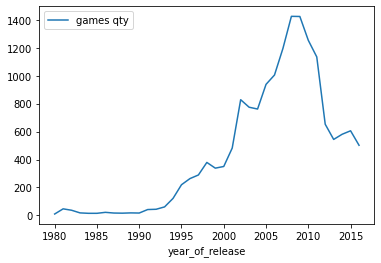

In [16]:
data[['year_of_release', 'name']].groupby('year_of_release').count().rename(columns = {'name': 'games qty'}).plot()

Примерно с 1990-го года начинается поступательный рост числа игр, с 2002-го и 2005-го рост более динамичный и резкий, пик (наибольшее количество выпущенных игр) - 2008-2009 годы, затем наблюдается почти такой же резкий спад (2010-2012 годы), который в 2013 году приводит график на уровень ниже 2002 года. Этот спад, по-видимому, обусловлен выпуском айфона и его популяризацией, соответственно, развитием игр для смартфона. Это привело к снижению, а затем и резкому спаду интереса к играм на консолях и компьютере. Скорее всего, "дно" было достигнутов в 2013-м году. Затем потребители, наигравшись в игры на смартфонах, начали вновь инетересоваться играми на консолях и компьютере: с 2014-го года наблидается медленный рост, который, возможно, будет наблюдаться в 2016-м году, так как данные за текущий год пока не полные.

Исследуем, как менялись продажи по платформам в разные годы. Попробуем определить примерный "жизненный цикл" популярной платформы. 

In [17]:
#Создадим сводную таблицу, которая покажет продажи по платформам
pt_platform = pd.pivot_table(data,
                            index = 'platform', 
                            values = 'sales',
                            aggfunc = 'sum')
pt_platform = pt_platform.sort_values(by='sales', ascending = False)
pt_platform

,sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Выберем платформы с наибольшими суммарными продажами. Будем считать большими суммарными продажами значения более 700 миллионов копий

In [18]:
#Сгруппируем платформы с небольшим количеством продаж в сегмент others
pt_platform = pt_platform.reset_index()
pt_platform['platform_grouped'] = pt_platform.apply(lambda x: 'others' if x['sales'] < 700 else x['platform'], axis = 1)
pt_platform = pt_platform.drop(columns='sales')
pt_platform

,platform,platform_grouped
0,PS2,PS2
1,X360,X360
2,PS3,PS3
3,Wii,Wii
4,DS,DS
5,PS,PS
6,PS4,others
7,GBA,others
8,PSP,others
9,3DS,others


In [19]:
#Объединим исходный датасет со сводной таблицей по популярным платформам
data = data.merge(pt_platform, on='platform', how='left')
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,nan_flg,sales,platform_grouped
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,False,82.54,Wii
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,True,40.24,others
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,False,35.52,Wii
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,False,32.77,Wii
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,True,31.38,others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,True,0.01,PS3
16440,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,unknown,True,0.01,X360
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,True,0.01,others
16442,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,unknown,True,0.01,others


In [20]:
#Построим сводную таблицу: продажи по наиболее популярным платформам и годам
pt_platform_years = pd.pivot_table(data,
                                  index = 'year_of_release',
                                  columns = data['platform_grouped'],
                                  values = 'platform_grouped',
                                  aggfunc = 'count')
pt_platform_years = pt_platform_years.fillna(0)
pt_platform_years = pt_platform_years.drop(columns = 'others')
pt_platform_years.style.background_gradient(cmap = 'Greens')

platform_grouped,DS,PS,PS2,PS3,Wii,X360
year_of_release,,,,,,
1980,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1981,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1982,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1983,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1984,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1985,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1986,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1987,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1988,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [21]:
#Переведём количество в проценты
for column in pt_platform_years:
    pt_platform_years[column] = pt_platform_years[column] / pt_platform_years[column].sum()
pt_platform_years

platform_grouped,DS,PS,PS2,PS3,Wii,X360
year_of_release,,,,,,
1980,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1981,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1982,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1983,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1984,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1985,0.000471,0.000000,0.000000,0.000000,0.000000,0.000000
1986,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1987,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1988,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Платформа DS демонстрирует странное поведение. Она была выпущена на рынок в 2004 году, но есть данные за 1985 год. Проверим эти строки.

In [22]:
data[(data['platform'] == 'DS') & (data['year_of_release'] == 1985)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,nan_flg,sales,platform_grouped
15704,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,unknown,True,0.02,DS


Это одна строка с явно ошибочными данными. Удалим её.

In [23]:
data = data[data.index!=15704]

In [24]:
#Посчитаем для каждой платформы количетсво лет, которое охватывает более 1% от проданных игр. 
#Эти годы будем считать активными годами существования платформы
#Найдём среднее значение
cycle_of_platform_life = []
for column in pt_platform_years:
    cycle_of_platform_life.append(pt_platform_years[pt_platform_years[column]>0.01][column].count())
print(cycle_of_platform_life)
print(sum(cycle_of_platform_life) / len(cycle_of_platform_life))


[9, 9, 11, 11, 7, 12]
9.833333333333334


Таким образом, "жизненный цикл платформы" составляет в среднем 10 лет: этого времени достаточно, чтобы платформа появилась, развилась, стала популярна, начала угасать и затем исчезла.

Для дальнейшего анализа будем использовать только данные за актуальный период. Вновь расммотрим распределение продаж по годам:

In [25]:
pt_years = pd.pivot_table(data,
                         index = 'year_of_release',
                         values = 'name',
                         aggfunc = 'count')
pt_years

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,13
1986,21
1987,16
1988,15


Будем считать актуальным период с 2013 по 2016 год, когда количество выпускаемых игр начало расти (количество выпущенных игр колебалось от 544 до 606). Год с минимальным количеством выпущенных игр - 2013-й (544 игры), далее начинается рост числа игр в год. Так как данные за 2016-й год пока не полные, возможно и в этом году этот тренд продолжится. Таким образом, мы будем исследовать период с 2013-го по 2016-е годы. 


In [26]:
#оставляем в датасете только данные с 2013 года.
data = data.query('year_of_release > 2012')
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,nan_flg,sales,platform_grouped
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,False,21.05,PS3
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,False,16.27,X360
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,True,14.63,others
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,True,14.60,others
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,False,12.62,others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16432,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,True,0.01,others
16436,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,unknown,True,0.01,others
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,True,0.01,PS3
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,True,0.01,others


In [27]:
#Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
#Создадим сводную таблицу, которая покажет продажи по платформам
pt_platform_years = pd.pivot_table(data,
                                  columns = 'year_of_release',
                                  index = data['platform'],
                                  values = 'sales',
                                  aggfunc = 'sum')
pt_platform_years = pt_platform_years.fillna(0)
pt_platform_years.style.background_gradient(cmap = 'Greens', axis = 1)

year_of_release,2013,2014,2015,2016
platform,,,,
3DS,56.570000,43.760000,27.780000,15.140000
DS,1.540000,0.000000,0.000000,0.000000
PC,12.380000,13.280000,8.520000,5.250000
PS3,113.250000,47.760000,16.820000,3.600000
PS4,25.990000,100.000000,118.900000,69.250000
PSP,3.140000,0.240000,0.120000,0.000000
PSV,10.590000,11.900000,6.250000,4.250000
Wii,8.590000,3.750000,1.140000,0.180000
WiiU,21.650000,22.030000,16.350000,4.600000


Лидируют по продажам PS4 и XOne, они же и единственные, кто растёт. Стабильно падают 3DS, PS3, PSP, PSV, X360. Перспективные платформы - PS4 и XOne.

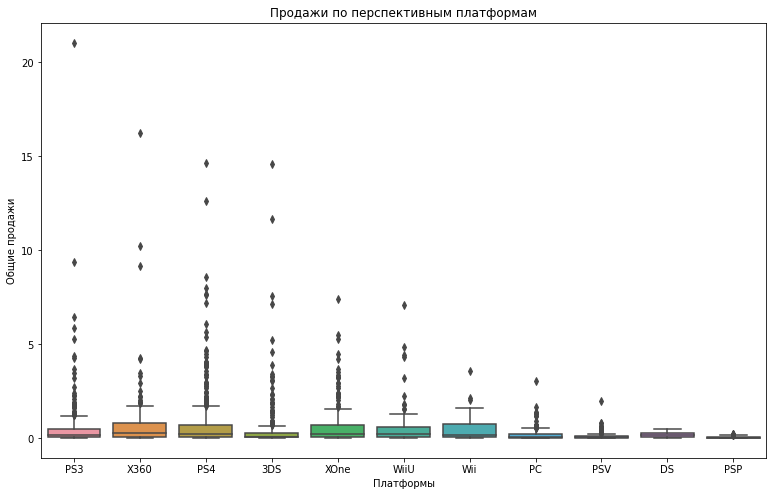

In [28]:
plt.figure(figsize=(13, 8))
(sns.boxplot(data = data, y = 'sales', x='platform')
    .set(title = 'Продажи по перспективным платформам', xlabel = 'Платформы', \
         ylabel = 'Общие продажи'))

plt.show()


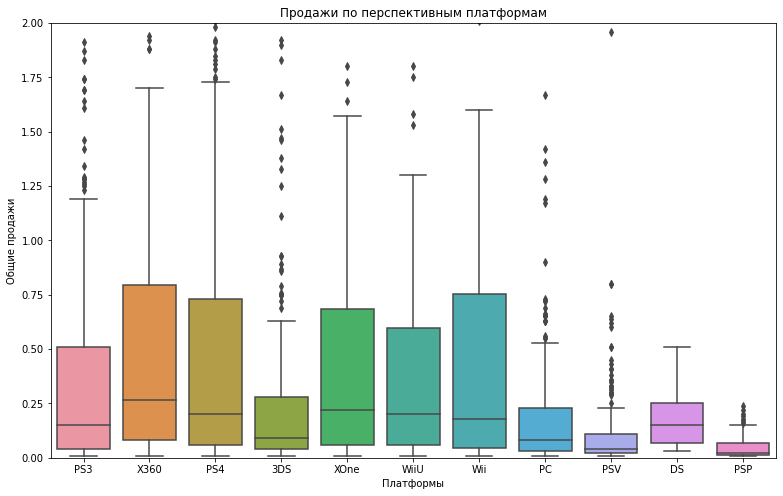

In [29]:
plt.figure(figsize=(13, 8))
(sns.boxplot(data = data, y = 'sales', x='platform')
    .set(title = 'Продажи по перспективным платформам', xlabel = 'Платформы', \
         ylabel = 'Общие продажи'))

ax = plt.gca()
ax.set_ylim([0 , 2])
plt.show()
 

Лучший показатель медианы у X360, однако мы знаем, что продажи платформы падают. Рассмотрев график, перспективными платформами можно считать X360, PS4, XOne, WiiU и Wii. Но мы рекомендуем всё же прежде всего руководствоваться динамикой продаж платформ по годам. 

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. В качестве популярной платформы возьмём PS4.


In [30]:
warnings.filterwarnings("ignore")

data_ps4 = data.query("platform == 'PS4'")

display(data_ps4['sales'].corr(data_ps4['critic_score']))
data_ps4['critic_score_rounded'] = (data_ps4['critic_score'] / 10).round(0) * 10

0.406567902061781

Корреляция есть, нужно рассмотреть её подробнее на графике. 

<AxesSubplot:xlabel='critic_score', ylabel='sales'>

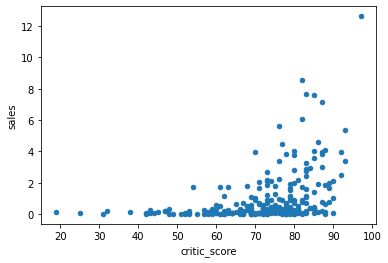

In [31]:
data_ps4.plot(x='critic_score', y='sales', kind='scatter') 

Видим, что оценённые критиками до 50 баллов игры продаются стабильно плохо. Чем выше оценка, тем больше разброс оценок. Чтобы проанализировать точнее, округлим оценки до 10. 

<AxesSubplot:xlabel='critic_score_rounded', ylabel='sales'>

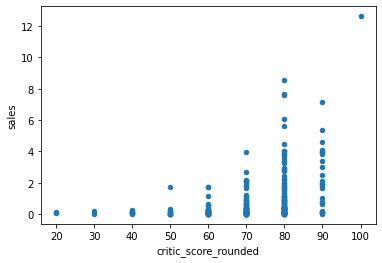

In [32]:
import warnings
warnings.filterwarnings("ignore")

data_ps4['critic_score_rounded'] = (data_ps4['critic_score'] / 10).round(0) * 10
data_ps4.plot(x='critic_score_rounded', y='sales', kind='scatter') 

Таким образом, мы наблюдаем зависимость продаж от оценок критиков. Зависимость не очень сильная, но она есть. Если критики ставят плохие оценки, то игра точно будет продаваться плохо. Оценка ниже 50 - приговор для игры. 
Теперь нужно понять точнее, как связаны хорошие оценки критиков и продажи. Для этого выберем, какие продажи стоит считать хорошими. Посмотрим описательную статистику для столбца "общие продажи".

In [33]:
data['sales'].describe([.01,.25,.5,.75,.8, .85, .86, .87, .88, .89, .9,.91,.92,.93, .94, .95, .96, .97, .98, .99])

count    2233.000000
mean        0.488442
std         1.235226
min         0.010000
1%          0.010000
25%         0.030000
50%         0.110000
75%         0.400000
80%         0.556000
85%         0.750000
86%         0.800000
87%         0.900000
88%         0.950000
89%         1.080000
90%         1.208000
91%         1.321200
92%         1.478800
93%         1.670000
94%         1.870800
95%         2.122000
96%         2.441600
97%         3.240400
98%         3.963600
99%         5.444400
max        21.050000
Name: sales, dtype: float64

Будем считать хорошей продажей - более 1 млн копий (чуть более 10% игр продаётся тиражами более 1 млн). Для простоты определим отсечку в 1 млн как критерийй успешна игра или нет. 
Далее посмотрим, как зависит от отзывов критиков успешность игры.

critic_score_rounded
20.0     0.000000
30.0     0.000000
40.0     0.000000
50.0     0.083333
60.0     0.085714
70.0     0.162162
80.0     0.347368
90.0     0.666667
100.0    1.000000
Name: good_game_probability, dtype: float64

<AxesSubplot:xlabel='critic_score_rounded'>

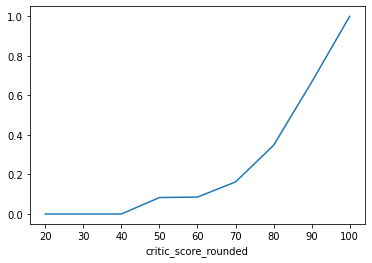

In [34]:
import warnings
warnings.filterwarnings("ignore")

#Добавим столбец, где флагом отмечены хорошие продажи
data_ps4['good_sales_flg'] = data_ps4['sales'].apply(lambda x: 1 if x >= 1 else 0)

#Создадим сводную таблицу: как распределены по отзывам критиков количество игр и количество успешных игр.
pt_ps4 = pd.pivot_table(data_ps4,
                        index = 'critic_score_rounded',
                        values = ['name', 'good_sales_flg'],
                        aggfunc = {'name': 'count', 'good_sales_flg': 'sum'})
pt_ps4 = pt_ps4.rename(columns = {'name': 'total_games'})

#Посчитаем вероятность успешности: делим количество успешных игр на общее количество игр
pt_ps4['good_game_probability'] = pt_ps4['good_sales_flg'] / pt_ps4['total_games']
display(pt_ps4['good_game_probability'])
display(pt_ps4['good_game_probability'].plot())

Мы видим четкий тренд: чем выше оценки критиков, тем выше вероятность того, что игра будет хорошо продаваться. Таким образом, имеет смысл ориентироваться на оценки критиков начиная с 60 баллов. Чем выше - тем лучше, однако в рекламу игр с оценками критиков менее 60 точно вкладываться не стоит, они хорошо продаваться не будут.

По тому же сценарию проанализируем зависимость успешности игры от оценок пользователей: посчитаем корреляцию, рассмотрим график распределения и рассчитаем вероятность успешности игры.

In [35]:
data_ps4['sales'].corr(data_ps4['user_score'])

-0.03195711020455639

По коэффициенту Пирсона получается, что корреляции быть не должно. Рассмотрим график:

<AxesSubplot:xlabel='user_score', ylabel='sales'>

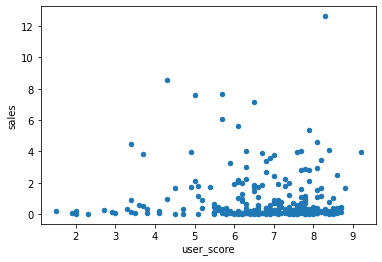

In [36]:
data_ps4.plot(x='user_score', y='sales', kind='scatter') 

На графике мы видим, что встречаются хорошо продающиеся игры, которые пользователи оценивают ниже среднего (менее 5), однако есть множество высокооценённых игр, которые продаются плохо. Построим таблицу, которая покажет как зависит вероятность успешности игры от оценок пользователей (будем использовать те же методы, что и в случае с оценками критиков). 

,good_sales_flg,total_games,sales,good_game_probability
user_score_rounded,,,,
2.0,0,5,0.50,0.000000
3.0,1,7,6.25,0.142857
4.0,3,12,16.90,0.250000
5.0,7,12,21.77,0.583333
6.0,18,58,65.05,0.310345
7.0,14,62,47.13,0.225806
8.0,20,92,77.69,0.217391
9.0,3,9,9.63,0.333333


<AxesSubplot:xlabel='user_score_rounded'>

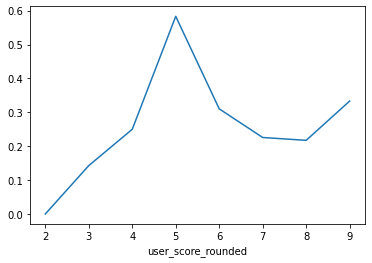

In [37]:
import warnings
warnings.filterwarnings("ignore")

data_ps4['user_score_rounded'] = data_ps4['user_score'].round(0)
pt_ps4 = pd.pivot_table(data_ps4,
                        index = 'user_score_rounded',
                        values = ['name', 'good_sales_flg', 'sales'],
                        aggfunc = {'name': 'count', 'good_sales_flg': 'sum', 'sales': 'sum'})
pt_ps4 = pt_ps4.rename(columns = {'name': 'total_games'})
pt_ps4['good_game_probability'] = pt_ps4['good_sales_flg'] / pt_ps4['total_games']
display(pt_ps4)
display(pt_ps4['good_game_probability'].drop(columns = 'sales').plot())

И коэффициент корреляции, и графики подтверждают, что продажи игр не зависят от отзывов пользователей. При планировании продаж на следующий год учитывать отзывы пользователей не стоит. 

Теперь соотнесём выводы с продажами игр на других платформах.

Коэффициент корреляции для PS3 равен 0.3342853393371919
Коэффициент корреляции для X360 равен 0.3503445460228664
Коэффициент корреляции для PS4 равен 0.406567902061781
Коэффициент корреляции для 3DS равен 0.35705661422881035
Коэффициент корреляции для XOne равен 0.41699832800840186
Коэффициент корреляции для WiiU равен 0.37641490654239124
Коэффициент корреляции для Wii равен nan
Коэффициент корреляции для PC равен 0.19603028294369382
Коэффициент корреляции для PSV равен 0.2547423503068656
Коэффициент корреляции для DS равен nan
Коэффициент корреляции для PSP равен nan


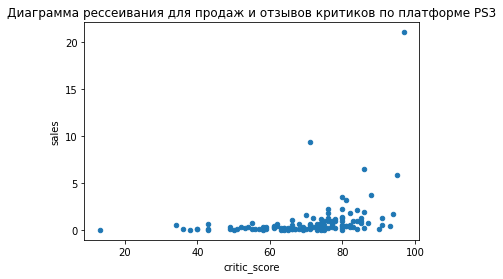

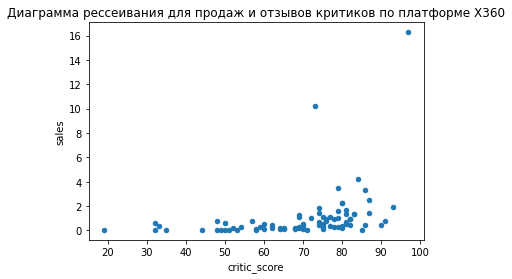

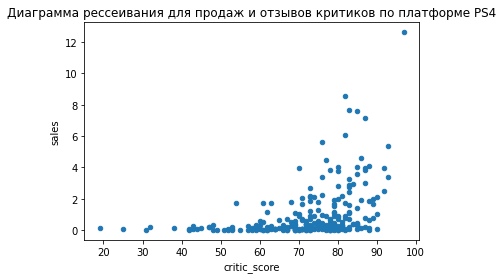

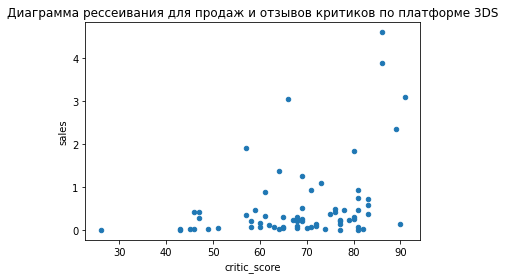

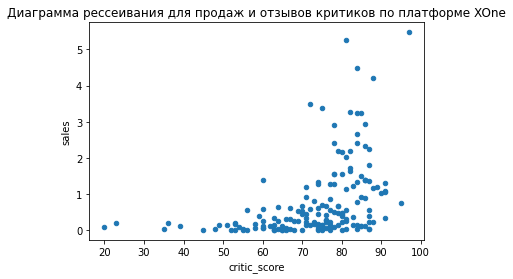

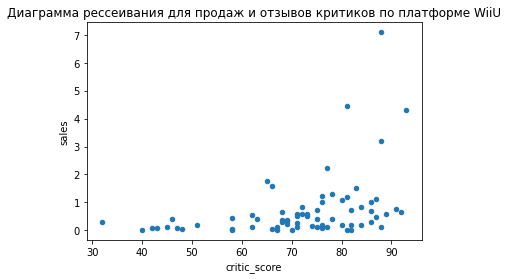

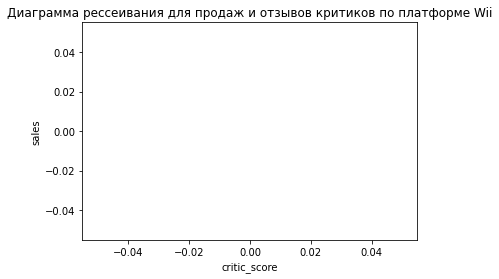

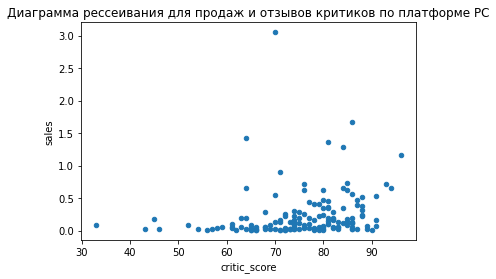

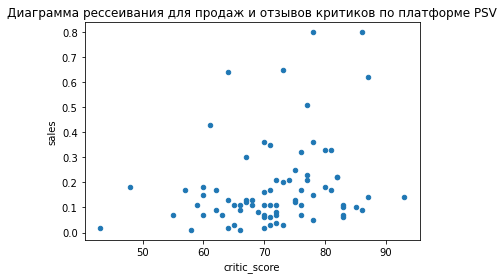

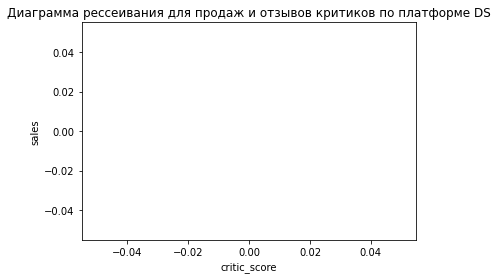

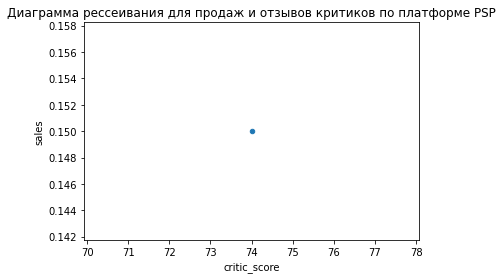

In [38]:
for p in data['platform'].unique():
    data_slice = data.query("platform == @p")
    corr = data_slice['sales'].corr(data_slice['critic_score'])
    print('Коэффициент корреляции для', p, 'равен', corr)
    data_slice.plot(x='critic_score', y='sales', kind='scatter')
    plt.title('Диаграмма рессеивания для продаж и отзывов критиков по плaтформе ' + p)



Корреляция положительная. Её коэффициент варьируется от платформы к платформе. Проанализируем её, используя вероятность успешности игры. 

In [39]:
import warnings
warnings.filterwarnings("ignore")

#Добавляем столбец, в котором будут отражены "хорошие" продажи (мы решили, что это выше 1 млн копий)
data['good_sales_flg'] = data['sales'].apply(lambda x: 1 if x >= 1 else 0)

#Округляем оценки критиков
data['critic_score_rounded'] = (data['critic_score'] / 10).round(0) * 10

#Создаём список со всеми уникальными оценками критиков
critic_score_list = data[data['critic_score_rounded'].notnull()]['critic_score_rounded'].unique().tolist()

#Создаём датафрейм на базе списка
pt_all_platforms = pd.DataFrame(data={'critic_score_rounded': critic_score_list})

#Через цикл для каждой платформы создаём сводную таблицу распределения для каждой оценки критиков количества количества игр и
#суммы игр с хорошими продажами
for platform in data['platform'].unique():
    tmp_df = data[(data['platform']==platform)&(data['critic_score_rounded'].notnull())]
    if tmp_df.shape[0] > 0:
        pt = pd.pivot_table(data[data['platform']==platform],
                                index = 'critic_score_rounded',
                                values = ['name', 'good_sales_flg'],
                                aggfunc = {'name': 'count', 'good_sales_flg': 'sum'})
        
        pt = pt.rename(columns = {'name': 'total_games'})
        #считаем вероятность успешности игры, затем уладяем ненужные колонки
        pt['good_game_probability'] = pt['good_sales_flg'] / pt['total_games']
        pt = pt.rename(columns = {'good_game_probability': platform})\
                            .reset_index()\
                            .drop(columns = ['good_sales_flg',
                                             'total_games'])
        
        #Объединяем созданный ранее датафрейм с уникальными оценками критиков и сводную таблицу
        pt_all_platforms = pt_all_platforms.merge(pt,
                                                  how = 'left',
                                                  left_on = 'critic_score_rounded',
                                                  right_on = 'critic_score_rounded')
        
        
    else:
        #сюда попадут платформы, у которых вообще нет заполненных оценок критиков
        print('Платформа ' + platform + ' не имеет оценок критиков')
        pass
        
#Чтобы посмотреть статистику продаж по платформам, создаём сводную таблицу распределения продаж, 
#количества заполненных оценок критиков и количества игр по платформам. 
platform_pt = pd.pivot_table(data,
                             index = 'platform',
                             values = ['sales', 'critic_score', 'name'],
                             aggfunc = {'sales': 'sum', 'critic_score': 'count', 'name': 'count'})
platform_pt = platform_pt.reset_index().rename(columns = {'name': 'games_qty', 'critic_score': 'critic_score_filled'})

#Добавляем процент заполненных оценок критиков
platform_pt['critic_score_filled_%'] = platform_pt['critic_score_filled'] / platform_pt['games_qty']
print('\n\nОбщие продажи платформ:')

display(platform_pt.sort_values(by = 'sales', ascending = False)\
        .style.background_gradient(cmap = 'RdYlGn', subset = ['critic_score_filled_%']))
print('\n\n\n')



print('Успешность игры в зависимости  от оценки критиков для платформ:')
display(pt_all_platforms.sort_values(by = 'critic_score_rounded', ascending = True).\
        fillna(0).style.background_gradient(cmap = 'Greens'))
print('\n\n\n')

print('По таблице мы видим, что чем выше оценки критиков, тем больше вероятности, что игра будет хорошо продаваться. Это справедливо  для платформ PS3, X360, PS4, XOne, WiiU.')

print('\n\n\n')

print('Рассмотрим детальнее платформы, где выполнение нашей тенденции вызывает вопросы.\n')
print('XOne:')
display(data[(data['platform']=='XOne')&(data['critic_score_rounded']==100.0)][['name', 'platform', 'sales', 'critic_score']])
print('Из-за небольшого числа игр с высокими оценками довольно вероятно, что попадется игра с низкими продажами. В разбивке по платформам это будет очень сильно влиять - в XOne в этом сплите было 2 игры, и одна оказалась с низкими продажами. Но если мы сложим все платформы, то получится ок.')

print('3DS:')
display(data[(data['platform']=='3DS')&(data['critic_score_rounded']==10.0)][['name', 'platform', 'sales', 'critic_score']])
print('По 3DS с наивысшими оценками не оказалось ни одной игры. По данной платформе очень плохая заполняемость оценками критиков - лишь 23%. Возможно выпадение из общей тенденции обусловлено именно этим. Оценок мало - волатильность высока.')


print('PC:')
print('На компьютерные игры, скорее всего, просто не корректно распространять логику игр для консолей')


print('PSV и PSP:')
print('У PSP только 1 заполненная оценка критиков. А PSV С учётом значительного количества игр и заполненных оценок критиков имеет низкие продажи, что, естественно, приближает вероятность успешности игры к 0.')

Платформа Wii не имеет оценок критиков
Платформа DS не имеет оценок критиков


Общие продажи платформ:


,platform,critic_score_filled,games_qty,sales,critic_score_filled_%
4,PS4,252,392,314.140000,0.642857
3,PS3,121,345,181.430000,0.350725
10,XOne,169,247,159.320000,0.684211
0,3DS,71,303,143.250000,0.234323
9,X360,81,186,136.800000,0.435484
8,WiiU,70,115,64.630000,0.608696
2,PC,149,189,39.430000,0.788360
6,PSV,77,358,32.990000,0.215084
7,Wii,0,23,13.660000,0.000000
5,PSP,1,67,3.500000,0.014925






Успешность игры в зависимости  от оценки критиков для платформ:


,critic_score_rounded,PS3,X360,PS4,3DS,XOne,WiiU,PC,PSV,PSP
9,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,50.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,60.000000,0.000000,0.000000,0.085714,0.125000,0.038462,0.142857,0.055556,0.000000,0.000000
1,70.000000,0.161290,0.352941,0.162162,0.157895,0.114286,0.050000,0.025000,0.000000,0.000000
2,80.000000,0.317073,0.379310,0.347368,0.047619,0.367647,0.363636,0.033898,0.000000,0.000000
3,90.000000,0.500000,0.571429,0.666667,0.800000,0.625000,0.416667,0.040000,0.000000,0.000000
0,100.000000,1.000000,1.000000,1.000000,0.000000,0.500000,0.000000,1.000000,0.000000,0.000000






По таблице мы видим, что чем выше оценки критиков, тем больше вероятности, что игра будет хорошо продаваться. Это справедливо  для платформ PS3, X360, PS4, XOne, WiiU.




Рассмотрим детальнее платформы, где выполнение нашей тенденции вызывает вопросы.

XOne:


,name,platform,sales,critic_score
165,Grand Theft Auto V,XOne,5.47,97.0
2683,Metal Gear Solid V: The Phantom Pain,XOne,0.75,95.0


Из-за небольшого числа игр с высокими оценками довольно вероятно, что попадется игра с низкими продажами. В разбивке по платформам это будет очень сильно влиять - в XOne в этом сплите было 2 игры, и одна оказалась с низкими продажами. Но если мы сложим все платформы, то получится ок.
3DS:


,name,platform,sales,critic_score


По 3DS с наивысшими оценками не оказалось ни одной игры. По данной платформе очень плохая заполняемость оценками критиков - лишь 23%. Возможно выпадение из общей тенденции обусловлено именно этим. Оценок мало - волатильность высока.
PC:
На компьютерные игры, скорее всего, просто не корректно распространять логику игр для консолей
PSV и PSP:
У PSP только 1 заполненная оценка критиков. А PSV С учётом значительного количества игр и заполненных оценок критиков имеет низкие продажи, что, естественно, приближает вероятность успешности игры к 0.


Теперь по тому же сценарию проанализируем корреляцию по платформам между продажами и оценками пользователей. Сначала посчитаем коэффициент корреляции и посмотрим диаграмму рассеивания. 

Коэффициент корреляции для PS3 равен 0.0023944027357566985
Коэффициент корреляции для X360 равен -0.011742185147181342
Коэффициент корреляции для PS4 равен -0.03195711020455639
Коэффициент корреляции для 3DS равен 0.24150411773563016
Коэффициент корреляции для XOne равен -0.06892505328279412
Коэффициент корреляции для WiiU равен 0.4193304819266187
Коэффициент корреляции для Wii равен 0.6829417215362368
Коэффициент корреляции для PC равен -0.09384186952476739
Коэффициент корреляции для PSV равен 0.000942472331910837
Коэффициент корреляции для DS равен nan
Коэффициент корреляции для PSP равен -0.9999999999999999


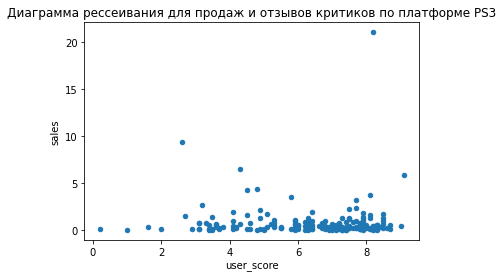

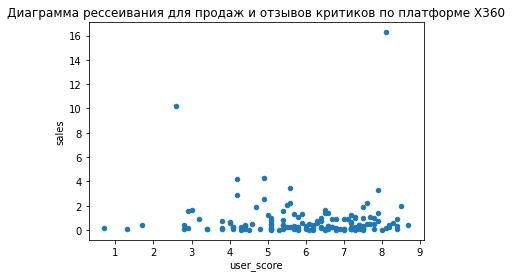

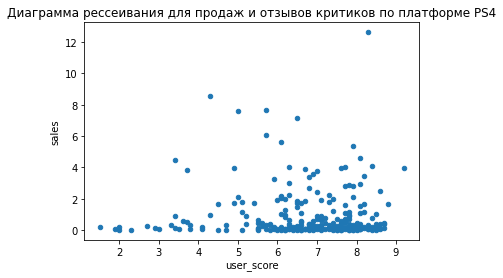

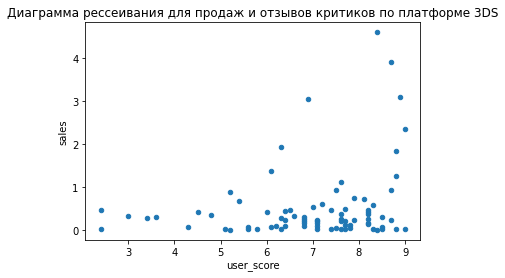

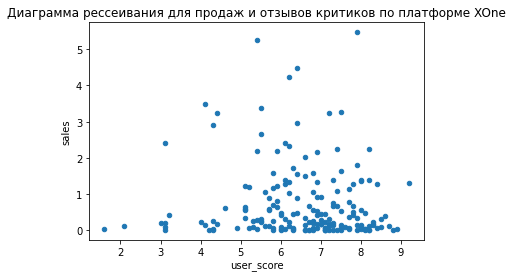

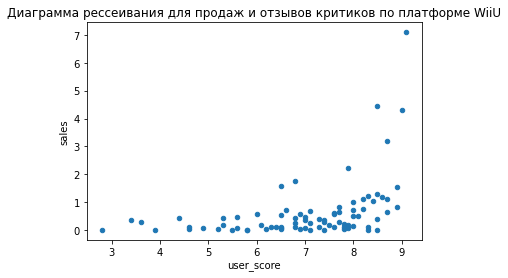

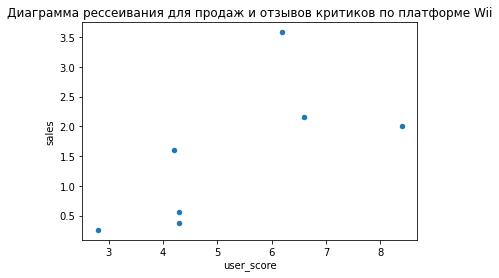

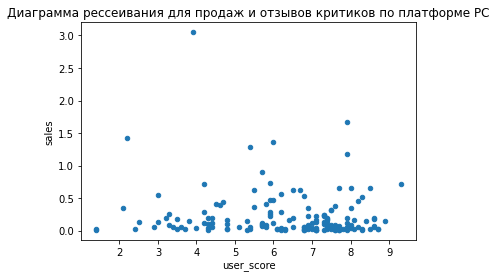

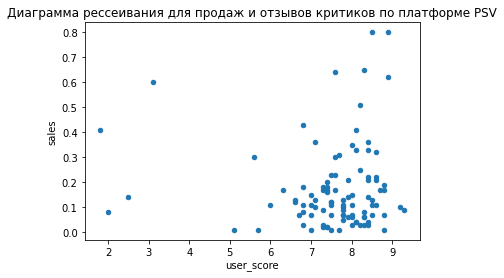

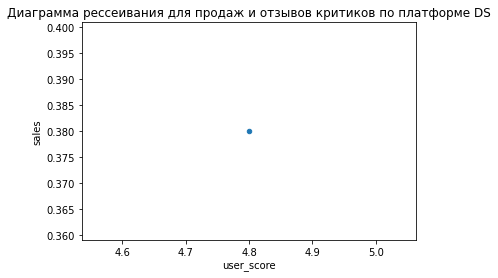

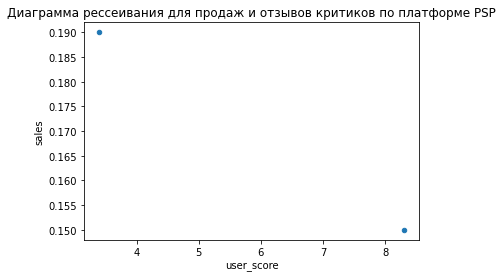

In [40]:
for p in data['platform'].unique():
    data_slice = data.query("platform == @p")
    corr = data_slice['sales'].corr(data_slice['user_score'])
    print('Коэффициент корреляции для', p, 'равен', corr)
    data_slice.plot(x='user_score', y='sales', kind='scatter')
    plt.title('Диаграмма рессеивания для продаж и отзывов критиков по плaтформе ' + p)

Теперь посмотрим, как оценки пользователей отражаются на успешности игры.

In [41]:
import warnings
warnings.filterwarnings("ignore")

#Добавляем столбец, в котором будут отражены "хорошие" продажи (мы решили, что это выше 1 млн копий)
data['good_sales_flg'] = data['sales'].apply(lambda x: 1 if x >= 1 else 0)

#Округляем оценки пользователй
data['user_score_rounded'] = data['user_score'].round(0)

#Создаём список со всеми уникальными оценками пользователей
user_score_list = data[data['user_score_rounded'].notnull()]['user_score_rounded'].unique().tolist()

#Создаём датафрейм на базе списка
pt_all_platforms = pd.DataFrame(data={'user_score_rounded': user_score_list})

#Через цикл для каждой платформы создаём сводную таблицу распределения для каждой оценки пользователей 
#количества количества игр и суммы игр с хорошими продажами
for platform in data['platform'].unique():
    tmp_df = data[(data['platform']==platform)&(data['user_score_rounded'].notnull())]
    if tmp_df.shape[0] > 0:
        pt = pd.pivot_table(data[data['platform']==platform],
                                index = 'user_score_rounded',
                                values = ['name', 'good_sales_flg'],
                                aggfunc = {'name': 'count', 'good_sales_flg': 'sum'})
        
        pt = pt.rename(columns = {'name': 'total_games'})
        #считаем вероятность успешности игры, затем уладяем ненужные колонки
        pt['good_game_probability'] = pt['good_sales_flg'] / pt['total_games']
        pt = pt.rename(columns = {'good_game_probability': platform})\
                            .reset_index()\
                            .drop(columns = ['good_sales_flg',
                                             'total_games'])
        
        #Объединяем созданный ранее датафрейм с уникальными оценками пользователей и сводную таблицу
        pt_all_platforms = pt_all_platforms.merge(pt,
                                                  how = 'left',
                                                  left_on = 'user_score_rounded',
                                                  right_on = 'user_score_rounded')
        
        
    else:
        #сюда попадут платформы, у которых вообще нет заполненных оценок критиков
        print('Платформа ' + platform + ' не имеет оценок пользователей')
        pass
        
#Чтобы посмотреть статистику продаж по платформам, создаём сводную таблицу распределения продаж, 
#количества заполненных оценок пользователей и количества игр по платформам. 
platform_pt = pd.pivot_table(data,
                             index = 'platform',
                             values = ['sales', 'user_score', 'name'],
                             aggfunc = {'sales': 'sum', 'user_score': 'count', 'name': 'count'})
platform_pt = platform_pt.reset_index().rename(columns = {'name': 'games_qty', 'user_score': 'user_score_filled'})

#Добавляем процент заполненных оценок критиков
platform_pt['user_score_filled_%'] = platform_pt['user_score_filled'] / platform_pt['games_qty']
print('\n\nОбщие продажи платформ:')

display(platform_pt.sort_values(by = 'sales', ascending = False)\
        .style.background_gradient(cmap = 'RdYlGn', subset = ['user_score_filled_%']))
print('\n\n\n')



print('Успешность игры в зависимости  от оценки пользователей для платформ:')
display(pt_all_platforms.sort_values(by = 'user_score_rounded', ascending = True).\
        fillna(0).style.background_gradient(cmap = 'Greens'))
print('\n\n\n')





Общие продажи платформ:


,platform,games_qty,sales,user_score_filled,user_score_filled_%
4,PS4,392,314.140000,257,0.655612
3,PS3,345,181.430000,186,0.539130
10,XOne,247,159.320000,182,0.736842
0,3DS,303,143.250000,80,0.264026
9,X360,186,136.800000,143,0.768817
8,WiiU,115,64.630000,80,0.695652
2,PC,189,39.430000,155,0.820106
6,PSV,358,32.990000,99,0.276536
7,Wii,23,13.660000,7,0.304348
5,PSP,67,3.500000,2,0.029851






Успешность игры в зависимости  от оценки пользователей для платформ:


,user_score_rounded,PS3,X360,PS4,3DS,XOne,WiiU,Wii,PC,PSV,DS,PSP
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000
1,3.000000,0.250000,0.333333,0.142857,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,4.000000,0.250000,0.125000,0.250000,0.000000,0.300000,0.000000,0.333333,0.055556,0.000000,0.000000,0.000000
4,5.000000,0.312500,0.250000,0.583333,0.000000,0.266667,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000
3,6.000000,0.133333,0.235294,0.310345,0.142857,0.382979,0.066667,1.000000,0.032258,0.000000,0.000000,0.000000
6,7.000000,0.024390,0.121212,0.225806,0.062500,0.185185,0.055556,1.000000,0.000000,0.000000,0.000000,0.000000
0,8.000000,0.241379,0.259259,0.217391,0.068966,0.255814,0.250000,1.000000,0.052632,0.000000,0.000000,0.000000
5,9.000000,0.200000,0.000000,0.333333,0.555556,0.200000,0.750000,0.000000,0.000000,0.000000,0.000000,0.000000


Как мы видим по таблице, зависимость между оценками пользователей и вероятностью успешности игры не прослеживается. Могут обнадёжить показатели для Wii, однако там слишком мало данных. 

Далее посмотрим на общее распределение игр по жанрам. 

In [42]:
pt_genre = pd.pivot_table(data,
                         index = 'genre',
                         values = ['name', 'sales'],
                         aggfunc = {'name':'count', 'sales':'sum'})
pt_genre = pt_genre.rename(columns = {'name': 'games_qty'})
pt_genre

,games_qty,sales
genre,,
Action,766,321.87
Adventure,245,23.64
Fighting,80,35.31
Misc,155,62.82
Platform,74,42.63
Puzzle,17,3.17
Racing,85,39.89
Role-Playing,292,145.89
Shooter,187,232.98


In [43]:
#Отсортируем таблицу по количеству игр: посмотрим, в каких жанрах игр больше
pt_genre.sort_values(by = 'games_qty', ascending = False)

,games_qty,sales
genre,,
Action,766,321.87
Role-Playing,292,145.89
Adventure,245,23.64
Sports,214,150.65
Shooter,187,232.98
Misc,155,62.82
Racing,85,39.89
Fighting,80,35.31
Platform,74,42.63


По количеству игр лидирует жанр Action, далее с большм отрывом от него (и поступательным шагом вниз друг от друга) расположились жанры Role-Playing, Adventure, Sports и Misc. Остальные жанры сильно отстают. Самый непопулярный среди разработчиков игр жанр - Puzzle.

In [44]:
#Теперь отсортируем таблицу по продажам: игры в каких жанрах лучше продаются
pt_genre.sort_values(by = 'sales', ascending = False)

,games_qty,sales
genre,,
Action,766,321.87
Shooter,187,232.98
Sports,214,150.65
Role-Playing,292,145.89
Misc,155,62.82
Platform,74,42.63
Racing,85,39.89
Fighting,80,35.31
Adventure,245,23.64


Вновь Action оказался на первой строчке - это самый прибыльный жанр. В целом наиболее прибыльными жанрами стоит признать жанры Action, Shooter, Sports, Role-Playing и Misc. Остальные жанры можно назвать хуже продающимися. Самые плохие продажи вновь у жанра Puzzle.
Интересно, что жанр Shooter по количеству игр занимает пятое место и почти замыкает популярные игры, однако по продажам он второй. Возможно, это обусловлено тем, что в "шутерах" пользователи практически всегда играют друг с дургом (или друг против друга). Таким образом самих различных шутеров выпускается не так много, но играет в них много пользователей. 

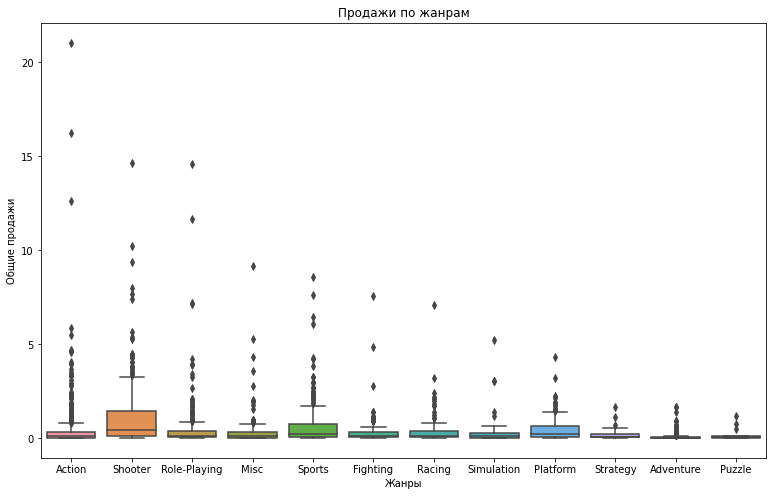

In [45]:
plt.figure(figsize=(13, 8))
(sns.boxplot(data = data, y = 'sales', x='genre')
    .set(title = 'Продажи по жанрам', xlabel = 'Жанры', \
         ylabel = 'Общие продажи'))

plt.show()
 


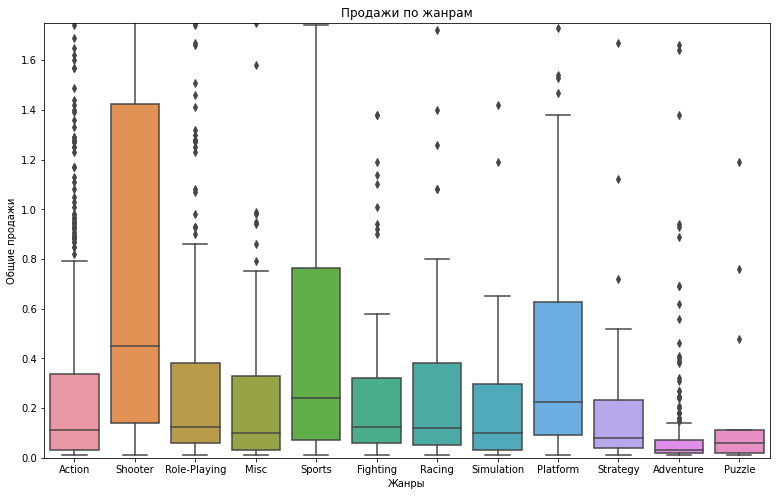

In [46]:
plt.figure(figsize=(13, 8))
(sns.boxplot(data = data, y = 'sales', x='genre')
    .set(title = 'Продажи по жанрам', xlabel = 'Жанры', \
         ylabel = 'Общие продажи'))

ax = plt.gca()
ax.set_ylim([0 , 1.75])


plt.show()
 


Диаграмма размаха показывает, что самым перспективным жанром всё же стоит признать шутеры. В этом жанре стабильно больше игр, которые продаются хорошо, медиана превосходит медианы всех других жанров, как и нижний квартиль. 
Также эта диаграмма показывает, что при планировании на следующий год стоит обратить внимание на жанр Platform (мы не учли его в анализе выше), у него тоже хорошие показатели. 

### Портрет пользователя региона <a name="regions"></a>

Обрисуем портрет пользователя каждого региона продаж. Исследует самые популярные платформы и жанры по регионам, а также посмотрим, влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [47]:
#Исследуем, насколько хорошо продаются игры с разных платформ по регионам
pt_regions = pd.pivot_table(data,
                      index = 'platform',
                      values = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales'],
                      aggfunc = 'sum')
pt_regions.style.background_gradient(cmap = 'Greens')

,eu_sales,jp_sales,na_sales,other_sales
platform,,,,
3DS,30.960000,67.810000,38.200000,6.280000
DS,0.850000,0.000000,0.570000,0.120000
PC,25.360000,0.000000,11.110000,2.960000
PS3,67.810000,23.350000,63.500000,26.770000
PS4,141.090000,15.960000,108.740000,48.350000
PSP,0.170000,3.290000,0.000000,0.040000
PSV,6.100000,18.590000,5.040000,3.260000
Wii,5.930000,0.050000,6.560000,1.120000
WiiU,19.850000,10.880000,29.210000,4.690000


,eu_sales,jp_sales,na_sales,other_sales
platform,,,,
3DS,7.890000,48.170000,8.730000,5.230000
DS,0.220000,0.000000,0.130000,0.100000
PC,6.470000,0.000000,2.540000,2.470000
PS3,17.290000,16.590000,14.510000,22.310000
PS4,35.970000,11.340000,24.840000,40.300000
PSP,0.040000,2.340000,0.000000,0.030000
PSV,1.560000,13.210000,1.150000,2.720000
Wii,1.510000,0.040000,1.500000,0.930000
WiiU,5.060000,7.730000,6.670000,3.910000


,platform,eu_sales
0,PS4,35.97
1,PS3,17.29
2,XOne,13.15
3,X360,10.84
4,3DS,7.89
5,others,14.86


,platform,jp_sales
0,3DS,48.17
1,PS3,16.59
2,PSV,13.21
3,PS4,11.34
4,WiiU,7.73
5,others,2.98


,platform,na_sales
0,PS4,24.84
1,XOne,21.27
2,X360,18.66
3,PS3,14.51
4,3DS,8.73
5,others,11.99


,platform,other_sales
0,PS4,40.30
1,PS3,22.31
2,XOne,11.89
3,X360,10.09
4,3DS,5.23
5,others,10.16


<AxesSubplot:title={'center':'OTHER'}, xlabel='platform'>

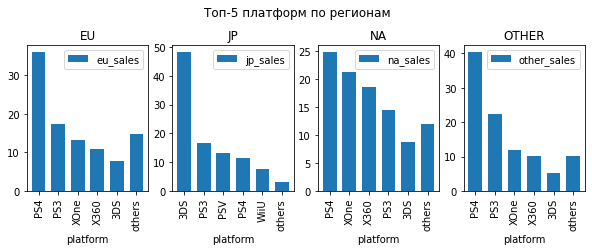

In [48]:
#Переведём в проценты
for column in pt_regions.columns.tolist():
    pt_regions[column] = (pt_regions[column] / pt_regions[column].sum() * 100).round(2)
    
display(pt_regions.style.background_gradient(cmap = 'Greens'))

columns = pt_regions.columns.tolist()
ax_counter = 0
fig, axes = plt.subplots(ncols=4)
fig.suptitle('Топ-5 платформ по регионам')
fig.subplots_adjust(top=0.8)

for column in columns:
    pt_tmp = pt_regions.sort_values(by = column, ascending = False).reset_index()
    pt_tmp2 = pt_tmp[pt_tmp.index<=4][['platform', column]]
    row = ['others', pt_tmp[pt_tmp.index>4][column].sum()]
    pt_tmp2.loc[len(pt_tmp2)] = row
    display(pt_tmp2)
    
    chart = pt_tmp2.\
            plot(ax=axes[ax_counter],
                kind='bar',
                x = 'platform',
                y = column,
                width = 0.7,
                figsize = (10,3),
                title = column.replace('_sales', '').upper())
    ax_counter += 1

display(chart)



<AxesSubplot:>

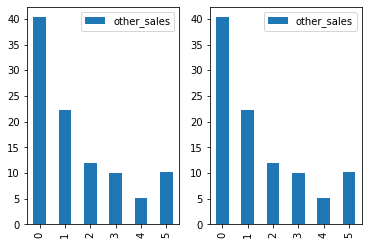

In [49]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2)
pt_tmp2.plot(ax=axes[0], kind='bar')
pt_tmp2.plot(ax=axes[1], kind='bar')

Европа Топ-5 платформ: PS4, PS3, XOne, X360, 3DS.

Япония Топ-5 платформ: 3DS, PS3, PSV, PS4, WiiU.

Северная Америна Топ-5 платформ: PS4, XOne, X360, PS3, 3DS.

Остальные страны Топ-5 платформ: PS4, PS3, XOne, X360, 3DS.


Интересно, что для всех регионов, кроме Японии, самые популярные платформы - PS4, PS3, XOne	и X360. Япониские же геймеры, в основном, играют в игры на 3DS (почти половина). 


Далее рассмотрим, насколько хорошо продаются игры разных жанров по регионам

In [50]:
pt_regions_genre = pd.pivot_table(data,
                                 index = 'genre',
                                 values = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales'],
                                 aggfunc = 'sum')
pt_regions_genre.style.background_gradient(cmap = 'Greens')

,eu_sales,jp_sales,na_sales,other_sales
genre,,,,
Action,118.130000,40.490000,126.050000,37.200000
Adventure,8.250000,5.820000,7.140000,2.430000
Fighting,8.550000,7.650000,15.550000,3.560000
Misc,20.040000,9.200000,27.490000,6.090000
Platform,15.580000,4.790000,18.140000,4.120000
Puzzle,1.000000,1.180000,0.830000,0.160000
Racing,20.190000,2.300000,12.960000,4.440000
Role-Playing,36.970000,51.040000,46.400000,11.480000
Shooter,87.860000,6.610000,109.740000,28.770000


In [51]:
#Переведём в проценты
for column in pt_regions_genre.columns.tolist():
    pt_regions_genre[column] = (pt_regions_genre[column] / pt_regions_genre[column].sum() * 100).round(2)
    
pt_regions_genre.style.background_gradient(cmap = 'Greens')

,eu_sales,jp_sales,na_sales,other_sales
genre,,,,
Action,30.120000,28.760000,28.800000,31.010000
Adventure,2.100000,4.130000,1.630000,2.030000
Fighting,2.180000,5.430000,3.550000,2.970000
Misc,5.110000,6.540000,6.280000,5.080000
Platform,3.970000,3.400000,4.140000,3.430000
Puzzle,0.250000,0.840000,0.190000,0.130000
Racing,5.150000,1.630000,2.960000,3.700000
Role-Playing,9.430000,36.260000,10.600000,9.570000
Shooter,22.400000,4.700000,25.070000,23.980000


,genre,eu_sales
0,Action,30.12
1,Shooter,22.40
2,Sports,15.43
3,Role-Playing,9.43
4,Racing,5.15
5,Others,17.47


,genre,jp_sales
0,Role-Playing,36.26
1,Action,28.76
2,Misc,6.54
3,Fighting,5.43
4,Shooter,4.70
5,Others,18.31


,genre,na_sales
0,Action,28.80
1,Shooter,25.07
2,Sports,14.91
3,Role-Playing,10.60
4,Misc,6.28
5,Others,14.33


,genre,other_sales
0,Action,31.01
1,Shooter,23.98
2,Sports,16.21
3,Role-Playing,9.57
4,Misc,5.08
5,Others,14.16


<AxesSubplot:title={'center':'OTHER'}, xlabel='genre'>

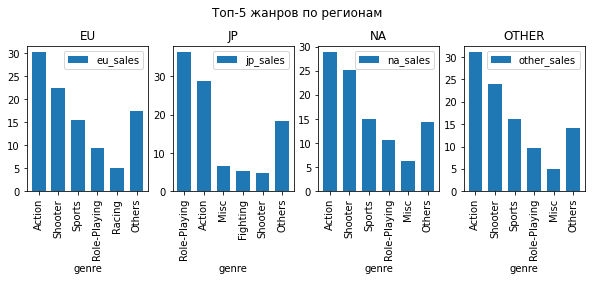

In [52]:
columns = pt_regions_genre.columns.tolist()
ax_counter = 0
fig, axes = plt.subplots(ncols=4)
fig.suptitle('Топ-5 жанров по регионам')
fig.subplots_adjust(top=0.8)

for column in columns:
    pt_tmp = pt_regions_genre.sort_values(by = column, ascending = False).reset_index()
    pt_tmp2 = pt_tmp[pt_tmp.index<=4][['genre', column]]
    row = ['Others', pt_tmp[pt_tmp.index>4][column].sum()]
    pt_tmp2.loc[len(pt_tmp2)] = row
    display(pt_tmp2)
    
    chart = pt_tmp2.\
            plot(ax=axes[ax_counter],
                kind='bar',
                x = 'genre',
                y = column,
                width = 0.7,
                figsize = (10,3),
                title = column.replace('_sales', '').upper())
    ax_counter += 1

display(chart)

Европа Топ-5 жанров: Action, Shooter, Sports, Role-Playing, Racing.

Япония Топ-5 жанров: Role-Playing, Action, Misc, Fighting, Shooter.

Северная Америна Топ-5 жанров: Action, Shooter, Sports, Role-Playing, Misc.

Остальные страны Топ-5 жанров: Action, Shooter, Sports, Role-Playing, Misc.


Вновь Япония очень сильно отличается от остальных регионов: в ней лидируют Role-Playing и Action, а остальные жанры намного менее популярны. Для неё стоило бы определять не топ-5, а топ-2. Остальные же регоины достаточно гомогенны в своих предпочтениях по жанрам.

Посмотрим, влияет ли рейтинг ESRB на продажи в отдельном регионе.

In [53]:
pt_regions_rating = pd.pivot_table(data,
                                 index = 'rating',
                                 values = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales'],
                                 aggfunc = 'sum')
pt_regions_rating.style.background_gradient(cmap = 'Greens')

,eu_sales,jp_sales,na_sales,other_sales
rating,,,,
E,83.360000,15.140000,79.050000,22.610000
E10+,42.690000,5.890000,54.240000,12.570000
M,145.320000,14.110000,165.210000,47.040000
T,41.950000,20.590000,49.790000,14.290000
unknown,78.910000,85.050000,89.420000,23.460000


In [54]:
#Переведём значения в проценты
for column in pt_regions_rating.columns.tolist():
    pt_regions_rating[column] = (pt_regions_rating[column] / pt_regions_rating[column].sum() * 100).round(2)
    
pt_regions_rating.style.background_gradient(cmap = 'Greens')

,eu_sales,jp_sales,na_sales,other_sales
rating,,,,
E,21.250000,10.750000,18.060000,18.850000
E10+,10.880000,4.180000,12.390000,10.480000
M,37.050000,10.020000,37.740000,39.210000
T,10.700000,14.630000,11.380000,11.910000
unknown,20.120000,60.410000,20.430000,19.550000


Можно утверждать, что рейтинг достаточно сильно влияет на продажи. Для Японии мы не можем его узнать, так как только для 40% игр, продающихся в Японии, нам известен рейтинг. Это по-видимому вызвано тем, что в Японии есть своё агентство, которое выставляет возрастной рейтинг. 
В остальных регионах лучше всего продаются игры с рейтингом "М" - игры для игроков старше 17 лет. Далее следуют игры с рейтингом "Е" - для игроков старше 6 лет. 
Для каждого региона достаточно много игр с неизвестным рейтингом: это также по-видимому вызвано тем, что существуют и другие агентства, которые определяют возрастной рейтинг игры. В каждой стране - свои. Агентство ESRB определяет возрастной рейтинг для США и Канады. То, что в Европе и других странах не наблюдается той же ситуации, что и в Японии, вероятно, свидетельствует о том, что там больше играют в игры, выпущенные в США. 

### Проверка гипотез <a name="check"></a>

Проверим гипотезу "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые." 
Нулевой гипотезой станет: "Средние пользовательские рейтинги платформ Xbox One и PC равны".
Альтернативная гипотеза: "Средние пользовательские рейтинги платформ Xbox One и PC не равны". Это двусторонняя гипотеза. 

In [55]:
#сформируем массивы, которые мы будем подавать в метод
array_XOne = data[(data['platform']=='XOne')&(data['user_score'].notnull())]['user_score'].tolist()
array_PC = data[(data['platform']=='PC')&(data['user_score'].notnull())]['user_score'].tolist()
print(len(array_XOne))
print(len(array_PC))

182
155


Размеры выборок разныe, поэтому добавим параметр equal_var (он примет значение False)

In [56]:
from scipy import stats as st
import numpy as np

array_XOne = data[(data['platform']=='XOne')&(data['user_score'].notnull())]['user_score'].tolist()
array_PC = data[(data['platform']=='PC')&(data['user_score'].notnull())]['user_score'].tolist()

#В качестве критического уровня статистической значимости выберем 5%. 
# если p-value окажется меньше него - отвергнем гипотезу
alpha = .05

results = st.ttest_ind(
    array_XOne, 
    array_PC, 
    equal_var = False)


print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


Значение p-value показывает: вероятность случайно получить такое или большее различие равно почти 15%. Значит мы не можем отвергунть гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Теперь проверим гипотезу "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные."
Нулевая гипотеза: "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») равны".
Альтернативная гипотеза: "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») не равны". 

In [57]:
#сформируем массивы, которые мы будем подавать в метод
array_action = data[(data['genre']=='Action')&(data['user_score'].notnull())]['user_score'].tolist()
array_sports = data[(data['genre']=='Sports')&(data['user_score'].notnull())]['user_score'].tolist()
print(len(array_action))
print(len(array_sports))

389
160


Размеры выборок разныe, поэтому добавим параметр equal_var (он примет значение False)

In [58]:
from scipy import stats as st
import numpy as np

array_action = data[(data['genre']=='Action')&(data['user_score'].notnull())]['user_score'].tolist()
array_sports = data[(data['genre']=='Sports')&(data['user_score'].notnull())]['user_score'].tolist()

#В качестве критического уровня статистической значимости выберем 5%. 
# если p-value окажется меньше него - отвергнем гипотезу
alpha = .05

results = st.ttest_ind(
    array_action, 
    array_sports, 
    equal_var = False)


print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу, поэтому принимаем альтернативную гипотезу: "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») не равны". 

### Выводы <a name="end"></a>

Основной задачей исследования было выявить закономерности, определяющие успешность игры. 
Проанализировав, сколько игр выпускалось в разные годы, мы пришли к выводу, что в данный момент гейм-индустрия находится в стадии медленного возрождения после проигранной конкуренции с играми на смартфонах. Поэтому мы отобрали для анализа только данные за актуальный период – с 2013 по 2016 год. 

На основании проведённого анализа мы пришли к следующим выводам:

- Среди платформ самыми перспективными по прадажам предлагаем признать PS4 и XOne. Их продажи растут год от года и их жизненный цикл (который, как мы выяснили, длится у платформы около 9 лет) ещё не дошёл до середины. 
- Выяснилось, что оценки критиков (в отличие от оценок пользователей) могут помочь предсказать успешность игры. Чем выше оценки критиков, тем выше вероятность того, что игра будет хорошо продаваться. Таким образом, при планировании стратегии продаж на следующий год имеет смысл ориентироваться на оценки критиков начиная с 60 баллов. Чем выше - тем лучше, однако в рекламу игр с оценками критиков менее 60 точно вкладываться не стоит, они хорошо продаваться не будут.
- Оценки пользователей не оказывают влияния на успешность игры. Их можно не учитывать.
- Среди жанров самый хорошо продающийся – Action. Жанры Shooter, Sports, Role-Playing и Misc также стоит признать перспективными для хороших продаж. 
- Стратегию продаж нужно будет скорректировать в зависимости от региона. В Японии лучше продаются игры для 3DS. В остальных регионах лидируют платформы PS4, PS3, XOne и X360. 
- Такие же региональные различия касаются и жанров хорошо продающихся игр: в Японии больше играют в игры в жанрах Role-Playing и Action, а в других регионах – в Action, Shooter, Sports, Role-Playing, Misc. Таким образом, при планировании продаж в Японии нужно максимально внимательно учитывать региональную специфику. Для остальных регионов это не насколько критично. 
- Во всех регионов, кроме Японии, лучше всего продаются игры с возрастным рейтингом «старше 17», далее следуют игры с рейтингом "Е" - для игроков старше 6 лет. Для Японии данных по рейтингу недостаточно: только для 40% игры, продающихся в Японии, нам известен рейтинг. 
- В ходе статистического анализа мы проверили и приняли гипотезы, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые и что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
- Для обеспечения качества будущих исследований нужно решить вопрос со сбором данных. Большое количество пропусков (особенно столбцы user_score и critic_score) привело к тому, что эти параметры мы смогли исследовать только для половины данных (пропусков в этих столбцах соответственно более 40 и 50 процентов).

Таким образом, при планировании стратегии продаж на следующий год необходимо будет проанализировать и учесть следующие метрики: оценки критиков, жанр игры, платформа, регион продаж.